In [64]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import cartopy.crs as ccrs
import cartopy

In [28]:
%matplotlib inline

In [29]:
grid_f = 'D:\\GeoPandasTutorial\\dataE5\\TravelTimes_to_5975375_RailwayStation.shp'
roads_f = 'D:\\GeoPandasTutorial\dataE5\\roads.shp'
metro_f = 'D:\\GeoPandasTutorial\\dataE5\\metro.shp'

In [30]:
print(roads_f)

D:\GeoPandasTutorial\dataE5\roads.shp


In [45]:
grid = gpd.read_file(grid_f)
roads = gpd.read_file(roads_f)
metro = gpd.read_file(metro_f)

In [46]:
metro.head()

,NUMERO,SUUNTA,geometry
0,1300M,1,LINESTRING (2561676.997249531 6681346.00195433...
1,1300M,2,LINESTRING (2550919.001803585 6672692.00211347...
2,1300M1,1,LINESTRING (2561676.997249531 6681346.00195433...
3,1300M1,2,LINESTRING (2559946.003624604 6678095.99842650...
4,1300M2,1,LINESTRING (2559946.003624604 6678095.99842650...


3067


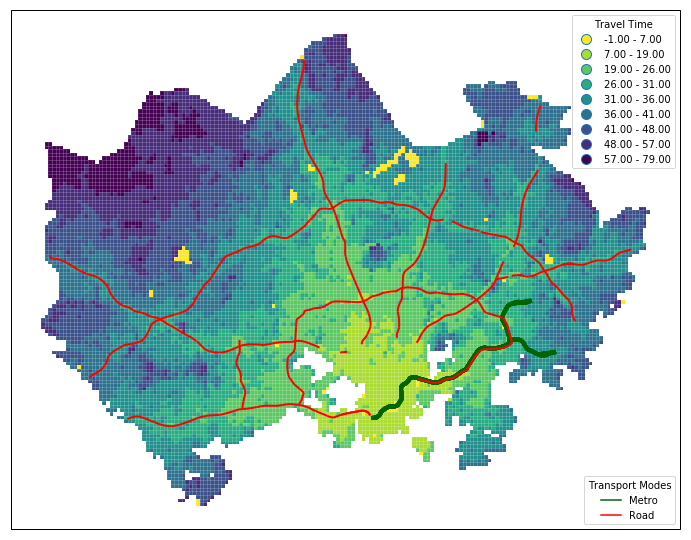

In [92]:
fig = plt.figure(figsize=(12, 12))

grid = gpd.read_file(grid_f)
roads = gpd.read_file(roads_f)
metro = gpd.read_file(metro_f)

grid_crs = grid.crs
print(grid_crs['init'][5:])

my_crs = ccrs.epsg(grid_crs['init'][5:])
ax = fig.add_subplot(1, 1, 1, projection=my_crs )


# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

roads['geometry'] = roads['geometry'].to_crs(crs=grid_crs)
metro['geometry'] = metro['geometry'].to_crs(crs=grid_crs)

metro_color = 'darkgreen'
road_color = 'red'

#  create some handle and labels for the line features
metro_h = mlines.Line2D([], [], color=metro_color, marker='',
                          markersize=15, label='Metro')
roads_h = mlines.Line2D([], [], color=road_color, marker='',
                          markersize=15, label='Road')
leg0 = plt.legend(handles=[metro_h, roads_h], loc=4)
leg0.set_title('Transport Modes')
plt.gca().add_artist(leg0)
                        
# display the commute times                        
grid.plot(ax=ax, column='car_r_t', cmap='viridis_r', scheme='fisher_jenks', k=9, legend=True)

# display the metro lines
metro.plot(ax=ax, linestyle='-', color=metro_color, linewidth=4, label='Metro')

# display the roads
roads.plot(ax=ax, linestyle='-', color=road_color, linewidth=2, label='Road')

# show the underlying grid
grid.plot(ax=ax, linewidth=1, edgecolor='white', facecolor='none', alpha=0.1 )

leg = ax.get_legend()                      
leg.set_title('Travel Time')


plt.show()

In [43]:
print(my_crs)

_EPSGProjection(3067)


In [44]:
metro.head()

,NUMERO,SUUNTA,geometry
0,1300M,1,LINESTRING (-595098.5235499844 6419576.7030224...
1,1300M,2,LINESTRING (-633859.3369893557 6386355.8131626...
2,1300M1,1,LINESTRING (-595098.5235499844 6419576.7030224...
3,1300M1,2,LINESTRING (-588689.0328135295 6423263.7606852...
4,1300M2,1,LINESTRING (-588689.0328135295 6423263.7606852...


In [52]:
grid.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((382000.0001358641 6697750.000038058,..."
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((382250.0001358146 6697750.000038053,..."
2,30133,50,31872,56,5785642,32940,121,146,32940,113,133,5975375,29626,423,"POLYGON ((382500.0001357661 6697750.000038046,..."
3,32690,54,34429,60,5785643,33233,125,150,33233,117,144,5975375,29919,427,"POLYGON ((382750.0001357181 6697750.000038039,..."
4,31872,42,31834,48,5787544,32127,109,126,32127,101,121,5975375,31674,452,"POLYGON ((381250.0001360176 6697500.000038121,..."
